# Import dataset and Filtering Target (Brazil)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("March 29, 2020.csv",index_col=0)

In [144]:
data.head(200)

,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplace,Residential,Country
Afghanistan,-38,-21,-13,-34,-33,10,Afghanistan
Angola,-61,-40,-39,-57,-11,22,Angola
Argentina,-86,-61,-89,-80,-57,27,Argentina
Aruba,-88,-66,-80,-88,-72,20,Aruba
Australia,-45,-19,-35,-58,-33,13,Australia
...,...,...,...,...,...,...,...
Venezuela,-62,-44,-57,-62,-25,16,Venezuela
Vietnam,-52,-29,-33,-49,-20,16,Vietnam
Yemen,-8,-1,-9,-9,-5,5,Yemen
Zambia,-21,-8,-6,-24,0,10,Zambia


In [0]:
brazil  = data[data.Country == 'Brazil'].copy()
brazil.head(28)

# source: https://brasil.io/home
incidence = [4.3,15.12303,5.2158,0.68917,3.42899,7.50375,2.25912,8.15806,4.13074,1.46758,
             1.34272,1.72193,2.23103,2.03129,3.5071,0.84617,0.95317,1.84157,0.73322,
             6.13085,3.674,7.21694,0.61894,6.93343,4.96874,1.39209,9.72581,1.01725]

# Pre-processing

In [0]:
brazil.loc[["State of Alagoas","State of Bahia","State of Ceará",
            "State of Maranhão","State of Paraíba","State of Pernambuco",
            "State of Piauí","State of Rio Grande do Norte","State of Sergipe"],"Region"] = "Northeast"

brazil.loc[["State of Tocantins","State of Roraima",
            "State of Rondônia","State of Pará","State of Amazonas",
            "State of Amapá","State of Acre"],"Region"] = "North" 

brazil.loc[["State of Santa Catarina","State of Rio Grande do Sul","State of Paraná"],"Region"] = "South"         

brazil.loc[["State of São Paulo","State of Rio de Janeiro",
            "State of Minas Gerais","State of Espírito Santo"], "Region"] = "Southeast"

brazil.loc[["State of Mato Grosso do Sul","State of Mato Grosso","State of Goiás"],"Region"] = "Midwest"

brazil.loc["Federal District","Region"] = "DF"

brazil.loc["Brazil",'Region'] = "Brazil"

brazil["Rate"] = incidence

In [0]:
brazil["Retail & recreation cat"] = pd.cut(brazil["Retail & recreation"],3, labels=["high", "medium", "low"])
brazil["Grocery & pharmacy cat"] = pd.cut(brazil["Grocery & pharmacy"],3, labels=["high", "medium", "low"])
brazil["Parks cat"] = pd.cut(brazil["Parks"],3, labels=["high", "medium", "low"])
brazil["Transit stations cat"] = pd.cut(brazil["Transit stations"],3, labels=["high", "medium", "low"])
brazil["Workplace cat"] = pd.cut(brazil["Workplace"],3, labels=["high", "medium", "low"])
brazil["Residential cat"] = pd.cut(brazil["Residential"],3, labels=["high", "medium", "low"])

In [0]:
brazil["UF"] = brazil.index

In [0]:
brazil["UF_min"] = ["BR","DF","AC","AL","AP","AM","BA","CE","ES","GO","MA","MT","MS","MG","PR","PB","PA",
                    "PE","PI","RN","RS","RJ","RO","RR","SC","SE","SP","TO"]

In [116]:
brazil.head(28)

,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplace,Residential,Country,Region,Rate,Retail & recreation cat,Grocery & pharmacy cat,Parks cat,Transit stations cat,Workplace cat,Residential cat,Area,UF,UF_min
Brazil,-71,-35,-70,-62,-34,17,Brazil,Brazil,4.30000,medium,medium,high,medium,high,medium,3937.817511,Brazil,BR
Federal District,-68,-28,-63,-56,-36,20,Brazil,DF,15.12303,medium,low,medium,low,high,low,4615.915402,Federal District,DF
State of Acre,-68,-20,-56,-75,-22,11,Brazil,North,5.21580,medium,low,medium,high,low,high,4778.728178,State of Acre,AC
State of Alagoas,-77,-43,-79,-76,-35,17,Brazil,Northeast,0.68917,high,high,high,high,high,medium,2849.223578,State of Alagoas,AL
State of Amapá,-71,-27,-51,-73,-28,11,Brazil,North,3.42899,medium,low,low,high,medium,high,4397.677000,State of Amapá,AP
State of Amazonas,-64,-28,-62,-46,-26,13,Brazil,North,7.50375,low,low,medium,low,medium,high,5610.978591,State of Amazonas,AM
State of Bahia,-73,-42,-71,-73,-33,17,Brazil,Northeast,2.25912,medium,high,high,high,high,medium,3452.843285,State of Bahia,BA
State of Ceará,-76,-34,-71,-68,-33,16,Brazil,Northeast,8.15806,high,medium,high,medium,high,medium,3452.843285,State of Ceará,CE
State of Espírito Santo,-68,-35,-69,-69,-31,16,Brazil,Southeast,4.13074,medium,medium,high,medium,medium,medium,4087.206893,State of Espírito Santo,ES
State of Goiás,-67,-27,-44,-50,-28,15,Brazil,Midwest,1.46758,low,low,low,low,medium,medium,5949.594524,State of Goiás,GO


In [23]:
# ref: https://mathbitsnotebook.com/Geometry/TrigApps/TAarea.html
import math
def triangle_area(a,b,angle,zero):
  return 0.5*(a-zero)*(b-zero)*np.sin(np.deg2rad(angle))

area = 0
lst = brazil.loc["State of Ceará",["Retail & recreation","Grocery & pharmacy","Parks","Transit stations","Workplace","Residential"]].tolist()

# calculate the area of all triangles that compose the polygon  
# 0,1
# 1,2
# 2,3
# 3,4
# 4,5
# 5,0
for a, b in zip(lst, lst[1:] + lst[:1]):
  area += triangle_area(a,b,360/len(lst),-84)
print(area)

3452.8432848885564


In [0]:
for index, row in brazil.iterrows(): 
    lst = row.iloc[:6].tolist()
    area = 0 
    for a, b in zip(lst, lst[1:] + lst[:1]):
      area += triangle_area(a,b,360/len(lst),-84)
    brazil.loc[index,"Area"] = area

In [26]:
brazil.Area.sort_values(ascending=False)

State of Goiás                  5949.594524
State of Mato Grosso            5944.831384
State of Tocantins              5914.087482
State of Pará                   5869.054161
State of Maranhão               5682.858700
State of Amazonas               5610.978591
State of Rondônia               5543.428610
State of Minas Gerais           5495.797212
State of Roraima                4894.342569
State of Acre                   4778.728178
State of Mato Grosso do Sul     4707.714095
Federal District                4615.915402
State of Amapá                  4397.677000
State of Piauí                  4345.715476
State of Espírito Santo         4087.206893
Brazil                          3937.817511
State of Pernambuco             3707.454754
State of São Paulo              3671.514699
State of Rio de Janeiro         3643.368874
State of Rio Grande do Norte    3611.758946
State of Paraná                 3552.869219
State of Paraíba                3512.166025
State of Bahia                  

# Exploratory Data Analysis

In [27]:
import plotly.express as px

fig = px.parallel_coordinates(brazil, 
                              color="Residential",
                              dimensions=["Retail & recreation","Grocery & pharmacy","Parks",
                                          "Transit stations","Workplace"],
                              color_continuous_scale=px.colors.sequential.matter,
                              color_continuous_midpoint=brazil.Residential.mean(),)
fig.show()

In [28]:
fig = px.parallel_categories(brazil, color="Residential",
                              dimensions=["Region","Retail & recreation cat","Grocery & pharmacy cat","Parks cat",
                                          "Transit stations cat","Workplace cat"],
                             color_continuous_scale=px.colors.sequential.matter,
                             color_continuous_midpoint=brazil.Residential.mean())
fig.show()

In [14]:
brazil.describe()

,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplace,Residential,Rate
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,-70.107143,-33.428571,-61.714286,-66.214286,-29.892857,15.392857,3.898660
std,5.363383,6.978425,13.388378,8.332698,6.172455,3.047030,3.409298
min,-80.000000,-49.000000,-84.000000,-83.000000,-40.000000,11.000000,0.618940
25%,-74.250000,-36.750000,-72.250000,-72.250000,-35.000000,12.000000,1.379748
50%,-71.000000,-33.500000,-66.000000,-66.500000,-32.000000,16.500000,2.844055
75%,-66.750000,-27.750000,-50.500000,-61.750000,-25.500000,17.000000,5.444562
max,-61.000000,-20.000000,-35.000000,-46.000000,-19.000000,20.000000,15.123030


In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

indicator = brazil.loc[["State of Rio Grande do Norte","Brazil"],"Area"].tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1,
                    subplot_titles=("Circ. Indicator :{:.2f}".format(indicator[0]), "Circ. Indicator :{:.2f}".format(indicator[1])),
                    horizontal_spacing=0.2
                    )

fig.add_trace(go.Scatterpolar(name = "Rio Grande do Norte",
                              r = brazil.loc["State of Rio Grande do Norte",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              1, 1)
fig.add_trace(go.Scatterpolar(name = "Brazil",
                              r = brazil.loc["Brazil",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              1, 2)

fig.update_traces(fill='toself')
fig.update_layout(polar = dict(
                               angularaxis = dict(direction = "clockwise"),
                               radialaxis = dict(visible = True,range = [-84, 20])
                               ),
                  polar2 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-84, 20])
                                )
                  )


#for i in range(0,2):
#  fig["layout"]['annotations'][i]["y"] *= 1.06 
#  fig["layout"]['annotations'][i]["font"]["size"] = 12 



#print(fig)
fig.show()

In [47]:
import plotly.graph_objects as go

data = [
    go.Scatterpolar(
      r = brazil.loc["State of Rio Grande do Norte",["Retail & recreation","Grocery & pharmacy",
                                           "Parks","Transit stations","Workplace","Residential"]].tolist(),
      theta = ['Retail & recreation','Grocery & pharmacy','Parks', 'Transit stations', 'Workplaces', 'Residential'],
      fill = 'toself',
      name = 'Rio Grande do Norte'
    )
]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-84, 20]
    )
  ),
  showlegend = True
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [0]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [0]:
brazil.head()

In [99]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


indicator = brazil.loc[["State of Goiás","State of Mato Grosso","State of Tocantins",
                        "State of Alagoas","State of Sergipe", "State of Santa Catarina"],"Area"].tolist()

fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2,
                    subplot_titles=("Indicator:{:.2f}".format(indicator[0]), "Indicator:{:.2f}".format(indicator[1]),
                                    "Indicator:{:.2f}".format(indicator[2]), "Indicator:{:.2f}".format(indicator[3]),
                                    "Indicator:{:.2f}".format(indicator[4]), "Indicator:{:.2f}".format(indicator[5])),
                    row_titles=("More Circulation","Less Circulation"),
                    horizontal_spacing=0.2)

fig.add_trace(go.Scatterpolar(name = "Goiás",
                              r = brazil.loc["State of Goiás",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              1, 1)
fig.add_trace(go.Scatterpolar(name = "Mato Grosso",
                              r = brazil.loc["State of Mato Grosso",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              1, 2)
fig.add_trace(go.Scatterpolar(name = "Tocantins",
                              r = brazil.loc["State of Tocantins",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              1, 3)
fig.add_trace(go.Scatterpolar(name = "Alagoas",
                              r = brazil.loc["State of Alagoas",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              2, 1)
fig.add_trace(go.Scatterpolar(name = "Sergipe",
                              r = brazil.loc["State of Sergipe",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              2, 2)
fig.add_trace(go.Scatterpolar(name = "Santa Catarina",
                              r = brazil.loc["State of Santa Catarina",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ,"Residential"]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']
                              ),
              2, 3)


fig.update_traces(fill='toself')
fig.update_layout(polar = dict(
                               angularaxis = dict(direction = "clockwise"),
                               radialaxis = dict(visible = True,range = [-84, 20])
                               ),
                  polar2 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-84, 20])
                                ),
                  polar3 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-84, 20])
                                ),
                  polar4 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-84, 20])
                                ),
                  polar5 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-84, 20])
                                ),
                  polar6 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-84, 20])
                                )
                  )

for i in range(3,6):
  fig["layout"]['annotations'][i]["y"] *= 1.16 
  fig["layout"]['annotations'][i]["font"]["size"] = 12 

for i in range(0,3):
  fig["layout"]['annotations'][i]["y"] *= 1.06 
  fig["layout"]['annotations'][i]["font"]["size"] = 12 

for i in range(-2,0):
  fig["layout"]['annotations'][i]['xanchor'] = 'right' 
  fig["layout"]['annotations'][i]['x'] = -0.1
  fig["layout"]['annotations'][i]['textangle'] = -90

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=100, r=150, t=100, b=30),
    legend=dict(x=1.1, y=1)
)

pio.write_image(fig,'fig1.png')
#fig.write_image("image2.png",width=800,height=600,scale=1)
#print(fig)
fig.show()

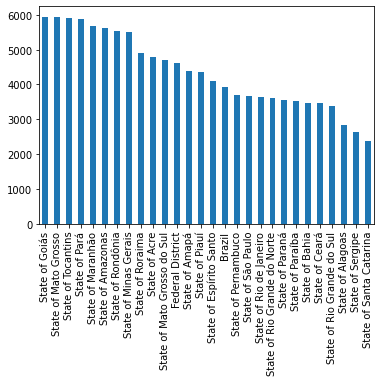

In [100]:
brazil.Area.sort_values(ascending=False).plot(kind="bar")

In [119]:
import plotly.express as px

fig = px.bar(brazil, x='UF_min', y='Area',
             hover_data=['Area','Retail & recreation', 'Grocery & pharmacy', 'Parks','Transit stations', 'Workplace', 'Residential'],
             color='Region',
             labels={'Area':'Circulation Indicator', "UF_min":""}, height=400)

pio.write_image(fig,'fig1.png')

fig.show()

In [123]:
brazil.groupby(by="Region").agg("mean")

,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplace,Residential,Rate,Area
Region,,,,,,,,
Brazil,-71.000000,-35.000000,-70.000000,-62.000000,-34.000000,17.000000,4.300000,3937.817511
DF,-68.000000,-28.000000,-63.000000,-56.000000,-36.000000,20.000000,15.123030,4615.915402
Midwest,-66.000000,-30.000000,-48.000000,-59.000000,-25.333333,13.333333,1.806847,5534.046668
North,-65.142857,-26.142857,-50.000000,-67.428571,-23.000000,11.714286,3.667333,5286.899513
Northeast,-73.555556,-37.555556,-68.222222,-70.111111,-31.666667,16.666667,2.599219,3693.069109
South,-76.666667,-43.333333,-75.666667,-69.000000,-36.666667,19.000000,4.049947,3106.144448
Southeast,-69.500000,-33.000000,-65.000000,-62.250000,-33.750000,16.250000,5.776195,4224.471920


In [139]:
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go


# linear regression
regline = sm.OLS(brazil.Rate,sm.add_constant(brazil.Area)).fit().fittedvalues

fig = px.scatter(brazil, x="Area", y="Rate", color="Region",
                 labels={"Area":"Circulation Indicator","Rate":"Incidence Rate"},
                 text="UF_min",size="Residential")

def add_trace_copy(trace):
    fig.add_traces(trace)
    new_trace = fig.data[-1]
    new_trace.update(textposition='top center', 
                     mode="text", showlegend=False)
    trace.update(mode="markers")
fig.for_each_trace(add_trace_copy)

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=brazil.Area, y=regline,
                          mode = 'lines',
                          marker_color='black',
                          name='Trend all')
                          )

fig.update_traces(textposition='middle center')

#print(fig)

fig.show()

In [43]:
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go


# linear regression
regline = sm.OLS(brazil.incidence,sm.add_constant(brazil.Residential)).fit().fittedvalues

fig = px.scatter(brazil, x="Residential", y="incidence", color="Region",
                 labels={"incidence":"Incidence Rate"},
                 text="UF_min",size="Area", trendline="OLS")

def add_trace_copy(trace):
    fig.add_traces(trace)
    new_trace = fig.data[-1]
    new_trace.update(textposition='top center', 
                     mode="text", showlegend=False)
    trace.update(mode="markers")
fig.for_each_trace(add_trace_copy)

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=brazil.Residential, y=regline,
                          mode = 'lines',
                          marker_color='black',
                          name='Trend all')
                          )

fig.update_traces(textposition='middle center')

#print(fig)

fig.show()

In [30]:
}import plotly
plotly.__version__

'4.6.0'

In [137]:
!pip install plotly==4.6.0

     |████████████████████████████████| 7.2MB 2.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

indicator = brazil.loc[["State of Mato Grosso","State of Goiás","State of Tocantins",
                        "State of Alagoas","State of Sergipe", "State of Santa Catarina"],"Area"].tolist()

fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2,
                    subplot_titles=("Indicator :{:.2f}".format(indicator[0]), "Indicator :{:.2f}".format(indicator[1]),
                                    "Indicator :{:.2f}".format(indicator[2]), "Indicator :{:.2f}".format(indicator[3]),
                                    "Indicator :{:.2f}".format(indicator[4]), "Indicator :{:.2f}".format(indicator[5])),
                    row_titles=("More Circulation","Less Circulation"))

fig.add_trace(go.Scatterpolar(name = "Mato Grosso",
                              r = brazil.loc["State of Mato Grosso",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work', 'Resid.']),
              1, 1)
fig.add_trace(go.Scatterpolar(name = "Goiás",
                              r = brazil.loc["State of Goiás",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work']),
              1, 2)
fig.add_trace(go.Scatterpolar(name = "Tocantins",
                              r = brazil.loc["State of Tocantins",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work']),
              1, 3)
fig.add_trace(go.Scatterpolar(name = "Alagoas",
                              r = brazil.loc["State of Alagoas",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work']),
              2, 1)
fig.add_trace(go.Scatterpolar(name = "Sergipe",
                              r = brazil.loc["State of Sergipe",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work']),
              2, 2)
fig.add_trace(go.Scatterpolar(name = "Santa Catarina",
                              r = brazil.loc["State of Santa Catarina",["Retail & recreation","Grocery & pharmacy",
                                                                             "Parks","Transit stations","Workplace"
                                                                             ]].tolist(),
                              theta = ['Retail','Grocery','Parks', 'Transit', 'Work']
                              ),
              2, 3)


fig.update_traces(fill='toself')
fig.update_layout(polar = dict(
                               angularaxis = dict(direction = "clockwise"),
                               radialaxis = dict(visible = True,range = [-80, 20])
                               ),
                  polar2 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-80, 20])
                                ),
                  polar3 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-80, 20])
                                ),
                  polar4 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-80, 20])
                                ),
                  polar5 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-80, 20])
                                ),
                  polar6 = dict(
                                angularaxis = dict(direction = "clockwise"),
                                radialaxis = dict(visible = True,range = [-80, 20])
                                )
                  )

for i in range(3,6):
  fig["layout"]['annotations'][i]["y"] *= 1.16 
  fig["layout"]['annotations'][i]["font"]["size"] = 12 

for i in range(0,3):
  fig["layout"]['annotations'][i]["y"] *= 1.06 
  fig["layout"]['annotations'][i]["font"]["size"] = 12 

for i in range(-2,0):
  fig["layout"]['annotations'][i]['xanchor'] = 'right' 
  fig["layout"]['annotations'][i]['x'] = 0.0
  fig["layout"]['annotations'][i]['textangle'] = -90

#print(fig)
fig.show()

In [52]:
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go


# linear regression
regline = sm.OLS(brazil.incidence,sm.add_constant(brazil.Area)).fit().fittedvalues

fig = px.scatter(brazil, x="Area", y="incidence", color="Region",
                 labels={"Area":"Quarantine Indicador","incidence":"Incidence Rate"},
                 text="UF_min",size="Residential", trendline="OLS")

def add_trace_copy(trace):
    fig.add_traces(trace)
    new_trace = fig.data[-1]
    new_trace.update(textposition='top center', 
                     mode="text", showlegend=False)
    trace.update(mode="markers")
fig.for_each_trace(add_trace_copy)

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=brazil.Area, y=regline,
                          mode = 'lines',
                          marker_color='black',
                          name='Trend all')
                          )

fig.update_traces(textposition='middle center')

#print(fig)

fig.show()

In [54]:
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go


# linear regression
regline = sm.OLS(brazil.incidence,sm.add_constant(brazil.Residential)).fit().fittedvalues

fig = px.scatter(brazil, x="Residential", y="incidence", color="Region",
                 labels={"incidence":"Incidence Rate"},
                 text="UF_min",size="Area", trendline="OLS")

def add_trace_copy(trace):
    fig.add_traces(trace)
    new_trace = fig.data[-1]
    new_trace.update(textposition='top center', 
                     mode="text", showlegend=False)
    trace.update(mode="markers")
fig.for_each_trace(add_trace_copy)

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=brazil.Residential, y=regline,
                          mode = 'lines',
                          marker_color='black',
                          name='Trend all')
                          )

fig.update_traces(textposition='middle center')

#print(fig)

fig.show()

In [0]:
brazil.sort_values(by="incidence").head(28)

In [133]:
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go


# linear regression
regline = sm.OLS(brazil.Area,sm.add_constant(brazil.Residential)).fit().fittedvalues

fig = px.scatter(brazil, x="Residential", y="Area", color="Region",
                 text="UF_min",size="Rate", trendline="OLS",
                 labels={"Area":"Circulation Indicator"})

def add_trace_copy(trace):
    fig.add_traces(trace)
    new_trace = fig.data[-1]
    new_trace.update(textposition='top center', 
                     mode="text", showlegend=False)
    trace.update(mode="markers")
fig.for_each_trace(add_trace_copy)

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=brazil.Residential, y=regline,
                          mode = 'lines',
                          marker_color='black',
                          name='Trend all')
                          )

fig.update_traces(textposition='middle center')

#print(fig)

fig.show()